# Time Series on Financial Applications
### Section 3: VAR

(a) Load the Dow Jones Industrial Average (DJIA) from djia.csv. Test whether "log(volume)" and "log(close)" are stationary or not using Augmented Dicky-Fuller Test at the $5\%$ significance level. 

(b) Take the first difference of variables and further test for stationary, if necessary.

(c) Estimate VAR(2).

(d) Plot Impulse Response Functions.

(e) Show Forecast Error Variance Decomposition (FEVD).

## Solutions

In [2]:
# load the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.tsa.api as smt
import warnings 
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
from statsmodels.tsa.stattools import acf, pacf, adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.api import VAR

In [3]:
df = pd.read_csv('djia.csv', parse_dates=['date'], index_col='date')  # load the data and we call the data as "df"
n = len(df)                  # n = sample size
volume = df["Volume"]
log_volume = np.log(volume)  # take log of volume
close = df["Close"]
log_close = np.log(close)    # take log of close

In [4]:
result_volume = adfuller(log_volume)    # adfuller is the function of doing ADF test
print('ADF Statistic: %f' % result_volume[0])
print('p-value: %f' % result_volume[1])
print('Critical Values:')
for key, value in result_volume[4].items():
    print('\t%s: %.3f' % (key,value))

ADF Statistic: -2.390163
p-value: 0.144532
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


In [5]:
result_close = adfuller(log_close)
print('ADF Statistic: %f' % result_close[0])
print('p-value: %f' % result_close[1])
print('Critical Values:')
for key, value in result_close[4].items():
    print('\t%s: %.3f' % (key,value))

ADF Statistic: -0.689706
p-value: 0.849398
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


The two variables are not stationary.

(b)

In [6]:
log_volume_diff = log_volume.diff(1).dropna()  # take the first difference and remove observation that is NaN
log_close_diff = log_close.diff(1).dropna()   # take the first difference and remove observation that is NaN

In [7]:
result_volume_diff = adfuller(log_volume_diff)
print('ADF Statistic: %f' % result_volume_diff[0])
print('p-value: %f' % result_volume_diff[1])
print('Critical Values:')
for key, value in result_volume_diff[4].items():
    print('\t%s: %.3f' % (key,value))

ADF Statistic: -14.451575
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


In [8]:
result_close_diff = adfuller(log_close_diff)
print('ADF Statistic: %f' % result_close_diff[0])
print('p-value: %f' % result_close_diff[1])
print('Critical Values:')
for key, value in result_close_diff[4].items():
    print('\t%s: %.3f' % (key,value))

ADF Statistic: -10.890284
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


After taking the first difference of varaibles, they become stationary.

(c)

In [9]:
mydata = pd.concat([log_volume_diff, log_close_diff], axis=1)    # combine two variables using the function "pd.concat"

In [10]:
model = VAR(mydata)     # estimate VAR model
result = model.fit(2)  # VAR(2)
result.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 24, Nov, 2022
Time:                     17:07:54
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -11.3812
Nobs:                     2515.00    HQIC:                  -11.3959
Log likelihood:           7213.71    FPE:                1.11469e-05
AIC:                     -11.4044    Det(Omega_mle):     1.11027e-05
--------------------------------------------------------------------
Results for equation Volume
               coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------
const            -0.000131         0.005562           -0.023           0.981
L1.Volume        -0.513695         0.019481          -26.369           0.000
L1.Close         -2.280762         0.464683           -4.908           0.00

(d)

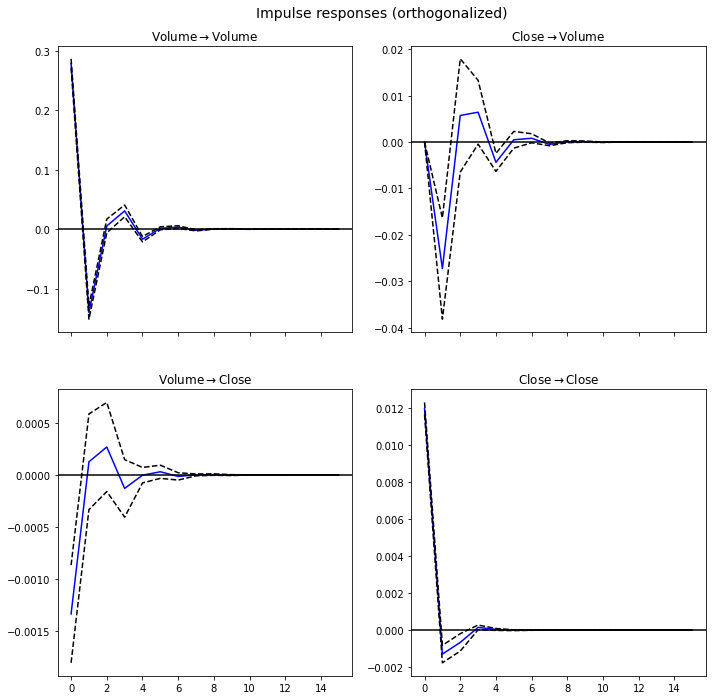

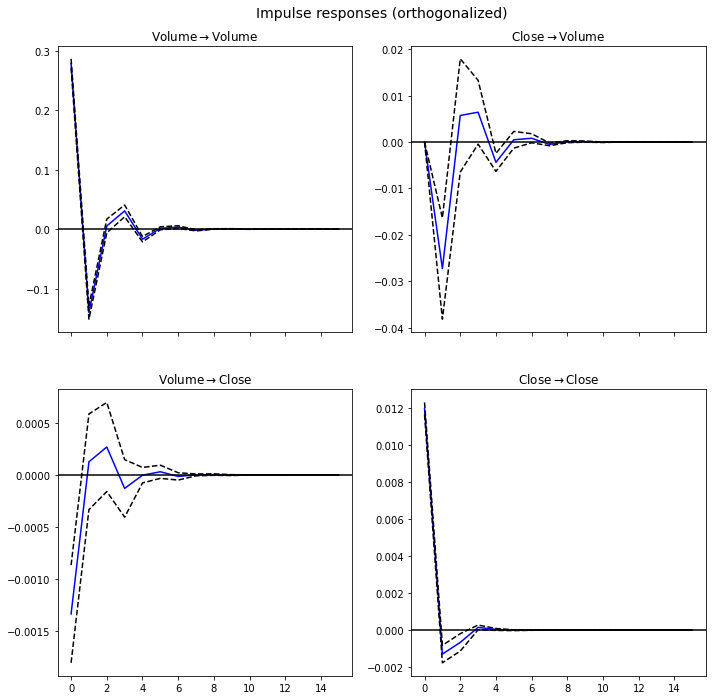

In [11]:
irf = result.irf(15)
irf.plot(orth=True)

(e)

In [12]:
fevd = result.fevd(10)   # forecast error variance decomposition
fevd.summary()

FEVD for Volume
       Volume     Close
0    1.000000  0.000000
1    0.992436  0.007564
2    0.992108  0.007892
3    0.991771  0.008229
4    0.991603  0.008397
5    0.991601  0.008399
6    0.991595  0.008405
7    0.991593  0.008407
8    0.991593  0.008407
9    0.991593  0.008407

FEVD for Close
       Volume     Close
0    0.012309  0.987691
1    0.012275  0.987725
2    0.012721  0.987279
3    0.012831  0.987169
4    0.012831  0.987169
5    0.012837  0.987163
6    0.012839  0.987161
7    0.012839  0.987161
8    0.012839  0.987161
9    0.012839  0.987161


